<a href="https://colab.research.google.com/github/linamendezh7/EjerciciosBIT-LinaMendez/blob/main/Actividad_7_Aprendizaje_no_supervisado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
proyecto= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotifydataset.csv')

In [5]:
print(f"Dimensiones del dataset: {proyecto.shape}")
proyecto.head(2)

Dimensiones del dataset: (1000, 23)


,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.00003,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.00000,0.0732,0.447,97.998


In [6]:
columna = pd.DataFrame(proyecto["key"])
columna

,key
0,5
1,7
2,10
3,0
4,1
...,...
995,0
996,6
997,9
998,2


In [7]:
proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   artist_name        1000 non-null   object 
 2   genres             837 non-null    object 
 3   followers          1000 non-null   int64  
 4   artist_popularity  1000 non-null   int64  
 5   artist_url         1000 non-null   object 
 6   track_name         1000 non-null   object 
 7   album_name         1000 non-null   object 
 8   release_date       1000 non-null   object 
 9   duration_ms        1000 non-null   int64  
 10  explicit           1000 non-null   bool   
 11  track_popularity   1000 non-null   int64  
 12  danceability       1000 non-null   float64
 13  energy             1000 non-null   float64
 14  key                1000 non-null   int64  
 15  loudness           1000 non-null   float64
 16  mode               1000 n

In [8]:
audio_features = [
     'danceability', 'valence', 'energy',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness'
]


In [9]:
X = proyecto[audio_features]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
print("Datos escalados correctamente.")

Datos escalados correctamente.


In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1000, 2)

In [13]:
X_pca

array([[-1.08729653e-01, -2.10881016e-01],
       [-9.48407713e-02,  2.13225420e-04],
       [ 4.66115662e-01,  9.01158636e-02],
       ...,
       [-3.77177437e-01,  5.82796224e-02],
       [-2.84295302e-01, -1.26821286e-01],
       [-3.24819480e-01,  4.64666975e-02]])

/tmp/ipython-input-1717041126.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], palette='Set2')


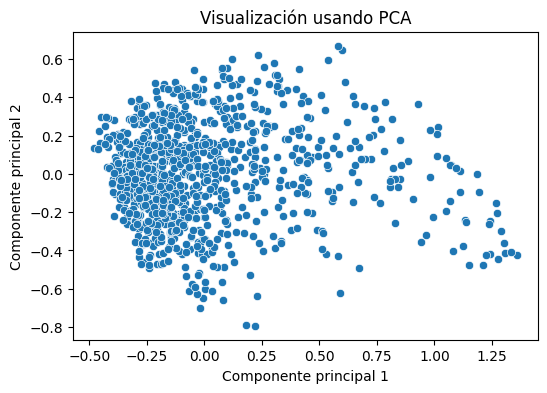

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], palette='Set2')
plt.title('Visualización usando PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [15]:
pca.explained_variance_ratio_

array([0.43091577, 0.21907714])

In [16]:
pca.components_

array([[-0.17141244, -0.25067234, -0.48036059,  0.73277898,  0.36304539,
        -0.08588936, -0.02984782],
       [ 0.3620266 ,  0.75559023, -0.12225569,  0.417783  , -0.32150464,
        -0.05475168,  0.04656255]])

In [17]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=audio_features
)

print("Pesos de cada variable en los componentes principales:")
print(loadings)

Pesos de cada variable en los componentes principales:
                       PC1       PC2
danceability     -0.171412  0.362027
valence          -0.250672  0.755590
energy           -0.480361 -0.122256
acousticness      0.732779  0.417783
instrumentalness  0.363045 -0.321505
liveness         -0.085889 -0.054752
speechiness      -0.029848  0.046563


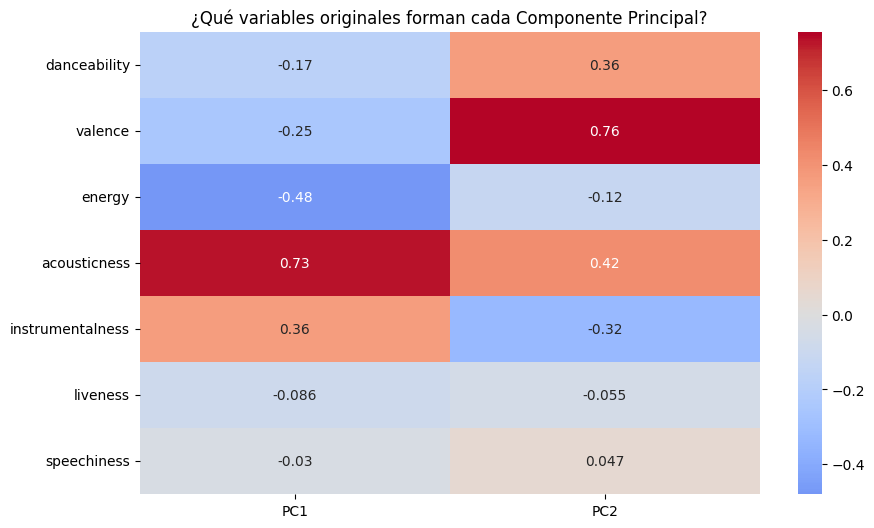

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('¿Qué variables originales forman cada Componente Principal?')
plt.show()

In [19]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)


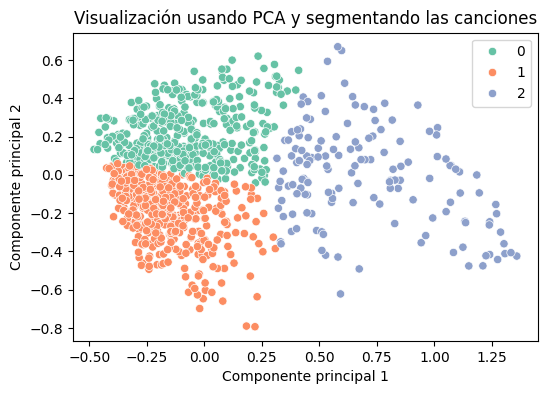

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], palette='Set2', hue = labels_kmeans)
plt.title('Visualización usando PCA y segmentando las canciones')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [22]:
proyecto["cluster"]= kmeans.labels_
proyecto.head(5)

,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842,1
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998,1
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726,2
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091,1
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998,0


In [23]:
from sklearn.metrics import silhouette_score
score_kmeans = silhouette_score(X_pca, labels_kmeans)
print(f"Silhouette Score KMeans: {score_kmeans:.2f}")

Silhouette Score KMeans: 0.38


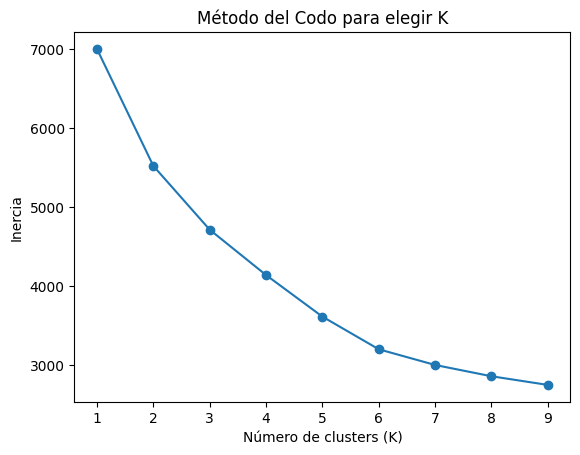

In [24]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.title('Método del Codo para elegir K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.show()

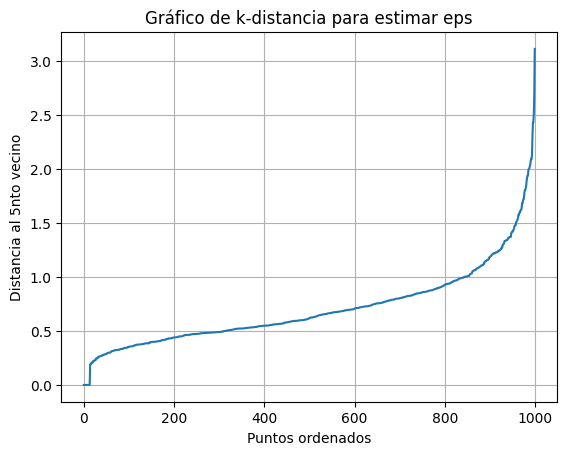

In [25]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 1])  # distancia al 2NDO vecino

plt.plot(distances)
plt.title('Gráfico de k-distancia para estimar eps')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 5nto vecino')
plt.grid()
plt.show()

In [26]:
proyecto_cluster = (
    proyecto.groupby("cluster")[['danceability', 'valence', 'energy',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness']].mean()
)

proyecto_cluster


,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
cluster,,,,,,,
0,0.707973,0.706044,0.667811,0.289546,0.002722,0.180089,0.105146
1,0.569233,0.405361,0.760442,0.072744,0.061524,0.213489,0.089032
2,0.472156,0.329866,0.337457,0.786061,0.313962,0.138080,0.060537


In [27]:
proyecto[proyecto["cluster"]==1]["genres"].value_counts()

,count
genres,
pop,23
british alternative rock,10
"alternative metal, metalcore, neon pop punk, pop punk, screamo",10
alternative metal,10
"australian rock, hard rock, rock",10
...,...
"british soul, neo soul",1
"europop, swedish pop",1
"filmi, modern bollywood",1


In [28]:
tabla_generos_cluster = pd.crosstab(
    proyecto["genres"],
    proyecto["cluster"]
)

tabla_generos_cluster


cluster,0,1,2
genres,,,
afrobeats,6,4,0
"afrobeats, nigerian pop",8,2,0
"album rock, classic rock, detroit rock, glam metal, glam rock, hard rock, metal, protopunk, rock",2,7,1
"album rock, classic rock, folk rock, mellow gold, soft rock",8,1,1
"album rock, classic rock, hard rock, rock",2,8,0
...,...,...,...
pov: indie,5,5,0
"puerto rican pop, reggaeton, trap latino, urbano latino",7,3,0
"reggaeton, reggaeton flow, trap boricua, trap latino, urbano latino",8,2,0


In [31]:
proyecto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   artist_name        1000 non-null   object 
 2   genres             837 non-null    object 
 3   followers          1000 non-null   int64  
 4   artist_popularity  1000 non-null   int64  
 5   artist_url         1000 non-null   object 
 6   track_name         1000 non-null   object 
 7   album_name         1000 non-null   object 
 8   release_date       1000 non-null   object 
 9   duration_ms        1000 non-null   int64  
 10  explicit           1000 non-null   bool   
 11  track_popularity   1000 non-null   int64  
 12  danceability       1000 non-null   float64
 13  energy             1000 non-null   float64
 14  key                1000 non-null   int64  
 15  loudness           1000 non-null   float64
 16  mode               1000 n

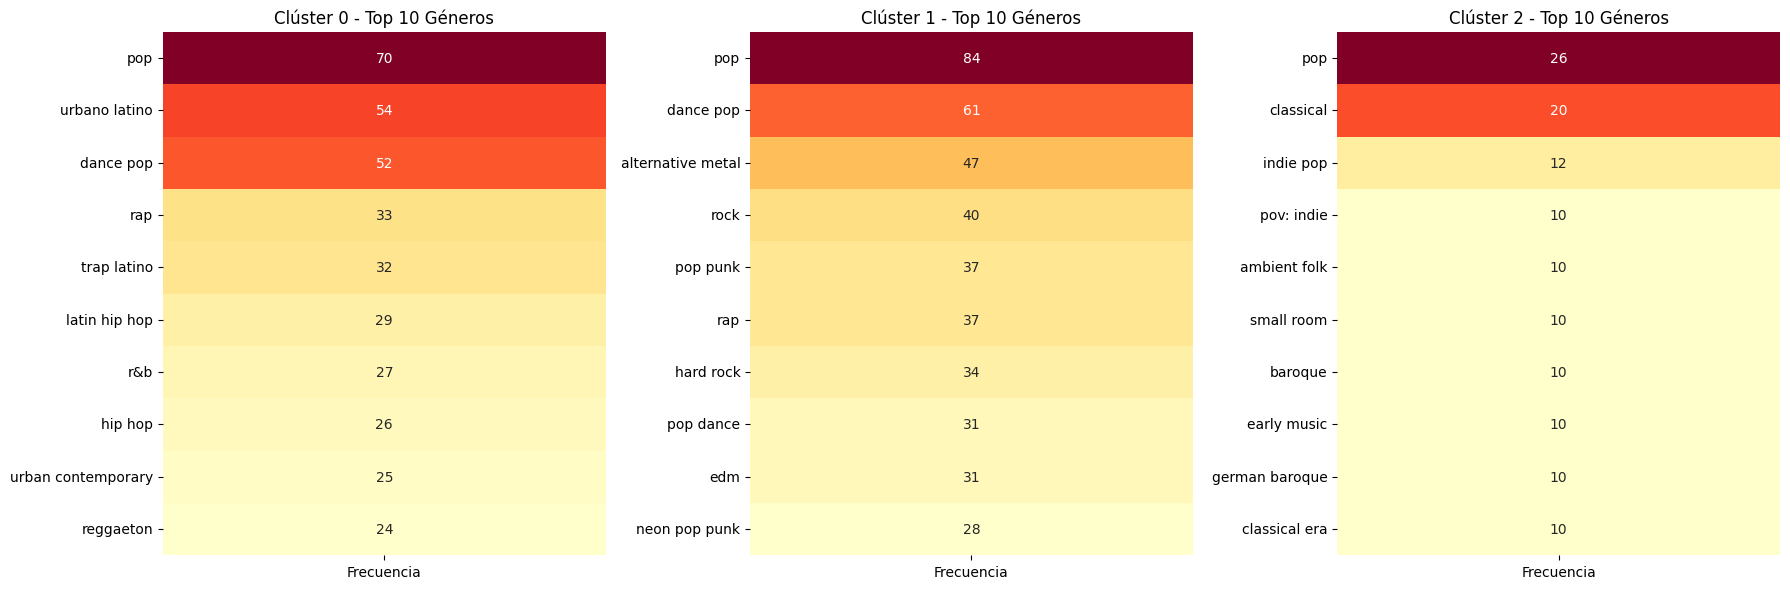

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, cluster_num in enumerate([0, 1, 2]):
    df_cluster = proyecto[proyecto['cluster'] == cluster_num]

    # Contar géneros
    genres_counts = df_cluster['genres'].str.split(',').explode().str.strip().value_counts()
    top10 = genres_counts.head(10)

    # Crear matriz: filas=géneros, columna=conteo
    matriz_heatmap = top10.values.reshape(10, 1)

    sns.heatmap(matriz_heatmap, annot=True, fmt='.0f', cmap='YlOrRd',
                ax=axes[i], cbar=False,
                yticklabels=top10.index,
                xticklabels=['Frecuencia'])
    axes[i].set_title(f'Clúster {cluster_num} - Top 10 Géneros')

plt.tight_layout()
plt.show()

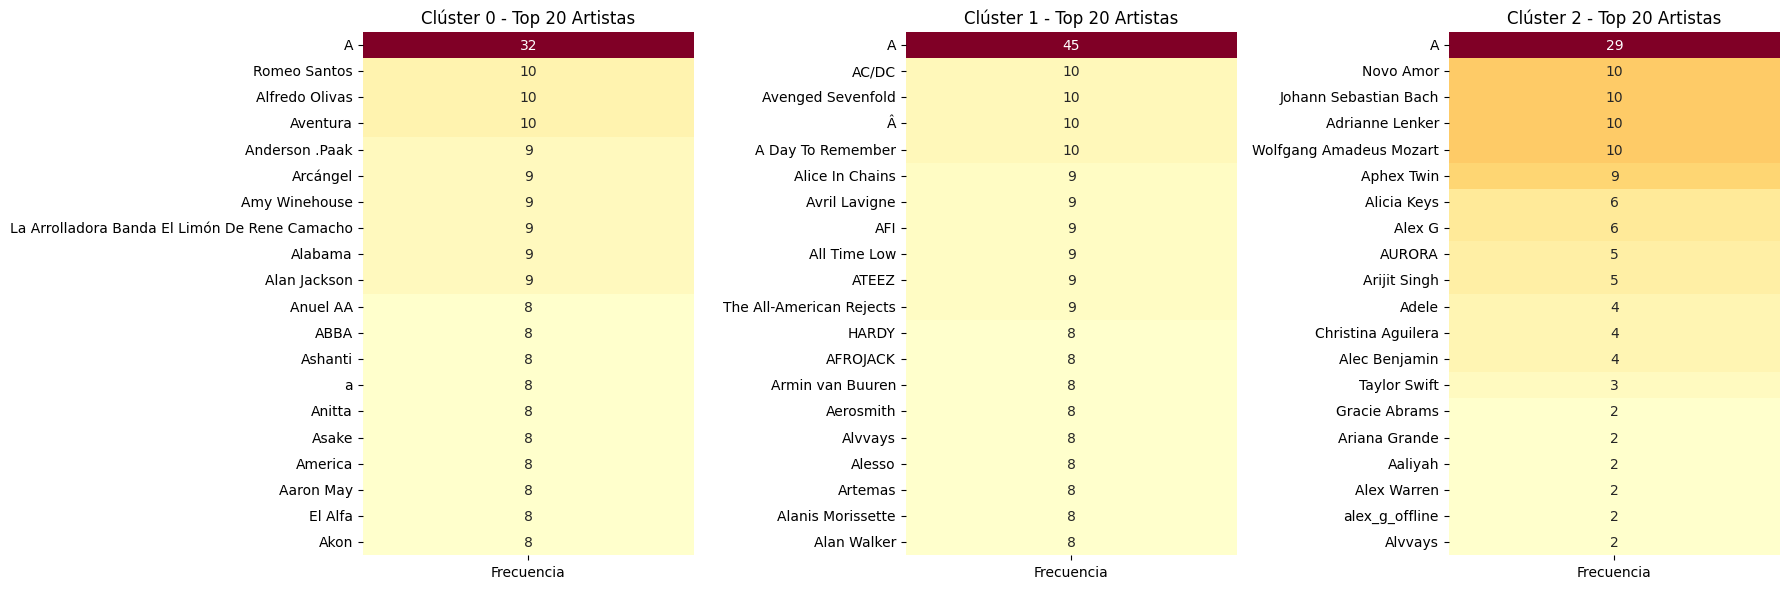

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, cluster_num in enumerate([0, 1, 2]):
    df_cluster = proyecto[proyecto['cluster'] == cluster_num]

    # Contar géneros
    genres_counts = df_cluster['artist_name'].str.split(',').explode().str.strip().value_counts()
    top10 = genres_counts.head(20)

    # Crear matriz: filas=géneros, columna=conteo
    matriz_heatmap = top10.values.reshape(20, 1)

    sns.heatmap(matriz_heatmap, annot=True, fmt='.0f', cmap='YlOrRd',
                ax=axes[i], cbar=False,
                yticklabels=top10.index,
                xticklabels=['Frecuencia'])
    axes[i].set_title(f'Clúster {cluster_num} - Top 20 Artistas')

plt.tight_layout()
plt.show()

Basado en el Heatmap, ¿qué tipo de canciones (tristes, bailables, acústicas) predominan en los diferentes Clusters?
Al incluir la información de artistas, que artistas estan en un mismo cluster? Coincide esto con su genero musical habitual?

Conclusion:
1. El cluster 0 tiene el mayor promedio de danceability, valence y energy, el cluster 1 es de mayor energy promedio pero la menor acousticness. El cluster 2 es el de menor energy pero el mayormente  instrumentalness y acousticness.
2. El cluster 0, integra bastante musica en español, como Bachata tal como Romeo Santos y Aventura. Asi como artistas pop y de regueton.
El cluster 1, esta más asociado a musica rock en ingles así como metal. El cluster 2, es musica más instumental y aqui entran artistas de musica clasica y pop más suave.



